<a href="https://colab.research.google.com/github/Pedro004-dot/easy2carbon/blob/main/easy2carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import geopandas as gpd
from shapely.geometry import box
from google.colab import files
import ee
import ee

# Autenticar no Earth Engine (API)
ee.Authenticate()

# Inicializar o Earth Engine (CHAVE DE ACESSO)
ee.Initialize(project="ee-pedrotorrezani")

# Abre o shape e extrai informações de geocoordenadas
fazenda1_shapefile_name = [name for name in fazenda1.keys() if name.endswith('.shp')][0]
fazenda1_farm_shape = gpd.read_file(fazenda1_shapefile_name)

# Converter o shapefile para um objeto ee.Geometry
fazenda_geometry1 = ee.Geometry.Polygon(fazenda1_farm_shape.geometry.iloc[0].__geo_interface__['coordinates'])

# Extrair a bounding box da geometria
bbox1 = fazenda1_farm_shape.total_bounds

# Pergunta ao usuário se deseja adicionar mais fazendas
resposta1 = input("Deseja adicionar mais uma fazenda (SIM ou NÃO)? ").lower()

# Se a resposta for "sim", continue adicionando fazendas
if resposta1 == "sim":
    fazenda2 = files.upload()
    fazenda2_shapefile_name = [name for name in fazenda2.keys() if name.endswith('.shp')][0]
    fazenda2_farm_shape = gpd.read_file(fazenda2_shapefile_name)
    fazenda_geometry2 = ee.Geometry.Polygon(fazenda2_farm_shape.geometry.iloc[0].__geo_interface__['coordinates'])
    bbox2 = fazenda2_farm_shape.total_bounds

    # Continue adicionando mais fazendas, se necessário
    resposta2 = input("Deseja adicionar mais uma fazenda (SIM ou NÃO)? ").lower()
    if resposta2 == "sim":
        fazenda3 = files.upload()
        fazenda3_shapefile_name = [name for name in fazenda3.keys() if name.endswith('.shp')][0]
        fazenda3_farm_shape = gpd.read_file(fazenda3_shapefile_name)
        fazenda_geometry3 = ee.Geometry.Polygon(fazenda3_farm_shape.geometry.iloc[0].__geo_interface__['coordinates'])
        bbox3 = fazenda3_farm_shape.total_bounds

        resposta3 = input("Deseja adicionar mais uma fazenda (SIM ou NÃO)? ").lower()
        if resposta3 == "sim":
            fazenda4 = files.upload()
            fazenda4_shapefile_name = [name for name in fazenda4.keys() if name.endswith('.shp')][0]
            fazenda4_farm_shape = gpd.read_file(fazenda4_shapefile_name)
            fazenda_geometry4 = ee.Geometry.Polygon(fazenda4_farm_shape.geometry.iloc[0].__geo_interface__['coordinates'])
            bbox4 = fazenda4_farm_shape.total_bounds

Deseja adicionar mais uma fazenda (SIM ou NÃO)? SIM


Saving Area_do_Imovel.shx to Area_do_Imovel (18).shx
Saving Area_do_Imovel.shp to Area_do_Imovel (18).shp
Saving Area_do_Imovel.dbf to Area_do_Imovel (18).dbf
Deseja adicionar mais uma fazenda (SIM ou NÃO)? SIM


Saving Area_do_Imovel.shp to Area_do_Imovel (19).shp
Saving Area_do_Imovel.shx to Area_do_Imovel (19).shx
Saving Area_do_Imovel.dbf to Area_do_Imovel (19).dbf
Deseja adicionar mais uma fazenda (SIM ou NÃO)? NAO


In [29]:
# Definir a área de interesse usando a bounding box para as 4 fazendas
aoi1 = ee.Geometry.Rectangle(list(bbox1))
if 'bbox2' in locals():
    aoi2 = ee.Geometry.Rectangle(list(bbox2))
    if 'bbox3' in locals():
        aoi3 = ee.Geometry.Rectangle(list(bbox3))
        if 'bbox4' in locals():
            aoi4 = ee.Geometry.Rectangle(list(bbox4))

# Definir o limite de cobertura de nuvens que o algoritmo aceita na imagem
CLOUD_COVER_MAX = 5

fazenda_image1 = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(fazenda_geometry1) \
    .filterDate('2023-06-01', '2023-12-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_COVER_MAX)) \
    .sort('CLOUD_COVER') \
    .first() \
    .select('B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12')  #bandas que serão requisitadas para o calculo de indices

export_task_fazenda1 = ee.batch.Export.image.toDrive(**{
    'image': fazenda_image1,
    'description': 'fazendaHack1',
    'folder': 'GEE_Images',
    'scale': 10,
    'region': aoi1.getInfo()['coordinates']
})
export_task_fazenda1.start()

if 'fazenda_image2' in locals():
    fazenda_image2 = ee.ImageCollection('COPERNICUS/S2') \
        .filterBounds(fazenda_geometry2) \
        .filterDate('2023-06-01', '2023-12-31') \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_COVER_MAX)) \
        .sort('CLOUD_COVER') \
        .first() \
        .select(['B4', 'B3', 'B2','B8', 'B7', 'B11','B5'])  #bandas que serão requisitadas para o calculo de indices

    export_task_fazenda2 = ee.batch.Export.image.toDrive(**{
        'image': fazenda_image2,
        'description': 'fazendaHack2',
        'folder': 'GEE_Images',
        'scale': 10,
        'region': aoi2.getInfo()['coordinates']
    })
    export_task_fazenda2.start()

if 'fazenda_image3' in locals():
    fazenda_image3 = ee.ImageCollection('COPERNICUS/S2') \
        .filterBounds(fazenda_geometry3) \
        .filterDate('2023-06-01', '2023-12-31') \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_COVER_MAX)) \
        .sort('CLOUD_COVER') \
        .first() \
        .select(['B4', 'B3', 'B2','B8', 'B7', 'B11','B5'])  #bandas que serão requisitadas para o calculo de indices

    export_task_fazenda3 = ee.batch.Export.image.toDrive(**{
        'image': fazenda_image3,
        'description': 'fazendaHack3',
        'folder': 'GEE_Images',
        'scale': 10,
        'region': aoi3.getInfo()['coordinates']
    })
    export_task_fazenda3.start()

if 'fazenda_image4' in locals():
    fazenda_image4 = ee.ImageCollection('COPERNICUS/S2') \
        .filterBounds(fazenda_geometry4) \
        .filterDate('2023-06-01', '2023-12-31') \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', CLOUD_COVER_MAX)) \
        .sort('CLOUD_COVER') \
        .first() \
        .select(['B4', 'B3', 'B2','B8', 'B7', 'B11','B5'])  #bandas que serão requisitadas para o calculo de indices

    export_task_fazenda4 = ee.batch.Export.image.toDrive(**{
        'image': fazenda_image4,
        'description': 'fazendaHack4',
        'folder': 'GEE_Images',
        'scale': 10,
        'region': aoi4.getInfo()['coordinates']
    })
    export_task_fazenda4.start()


In [30]:
!pip install rasterio

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

#nosso dataset com os pixels e os valores de indicides de vegetacao
data = pd.read_csv('/content/drive/MyDrive/hackLink/dataSetpixelsHackLink.csv', decimal=',')

# Separar características (X) e a classe alvo (y)
X = data[['NDVI', 'EVI', 'SAVI','NDWI1',  'GNDVI']]
y = data['CLASSES']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criamos o modelo random forest
clf = RandomForestClassifier(n_estimators=200, random_state=60)

# Treinar o modelo com o conjunto de treino
clf.fit(X_train, y_train)

# Avaliar o modelo com o conjunto de teste
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# clf é o modelo Random Forest treinado

dump(clf, 'pinduAI.joblib')


              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.95      0.94      0.94        31

[[ 8  0  0]
 [ 2  8  0]
 [ 0  0 13]]


['pinduAI.joblib']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


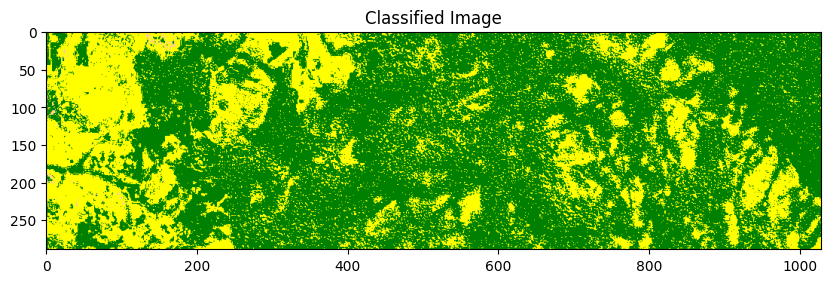

In [32]:
import rasterio
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from rasterio.plot import show
from joblib import load

# Carregar o modelo Random Forest do arquivo
pinduAI = load('pinduAI.joblib')


def calculate_indices(band_red, band_nir, band_blue, band_green, band_swir1):
    epsilon = 1e-10
    # Calcula os índices de vegetação para todas as posições dos pixels
    # Retorna uma matriz numpy com as mesmas dimensões das bandas de entrada,
    # onde cada pixel tem os valores de índice de vegetação calculados que possibilita classficar o pixel
    ndvi = (band_nir - band_red) / (band_nir + band_red)
    evi = 2.5 * (band_nir - band_red) / (band_nir +(6 * band_red)  - (7.5 * band_blue) + 1 + epsilon )
    savi = ((band_nir - band_red)* 1.5 / (band_nir + band_red + 0.5))
    ndwi = (band_nir - band_swir1) / (band_nir + band_swir1)
    gndvi = (band_nir - band_green) / (band_nir + band_green)
    return np.dstack((ndvi, evi, savi, ndwi, gndvi))

# Caminho para sua imagem .tiff
fazenda1_image_path = '/content/drive/MyDrive/GEE_Images/fazendaHack1.tif'



with rasterio.open(fazenda1_image_path) as src:
  #bandas que usamos para calcular os indices de vegetacao
    band_blue = src.read(2)  # B02
    band_green = src.read(3)  # B03
    band_red = src.read(4)  # B04
    band_nir = src.read(8)  # B08
    band_swir1 = src.read(11)  # B11

    # Calcular os índices de vegetação para cada pixel
    indices = calculate_indices(band_red, band_nir, band_blue, band_green, band_swir1)

    # Reformular para ter uma lista de amostras de pixels para classificação
    pixel_samples = indices.reshape(-1, 5)

    # Fazer as previsões com o modelo
    pixel_classes = clf.predict(pixel_samples)

    # Reformular as previsões para ter a mesma forma da imagem original
    classification_map = pixel_classes.reshape(band_red.shape)

 # Definir o mapeamento de cores para a imagem classificada
color_mapping = {1: [255, 255, 0],     # Amarelo para pastagem
                 2: [255, 192, 203],   # Rosa para agricultura
                 3: [0, 128, 0]}       # Verde para vegetação natural

# Aplicar o mapeamento de cores para cada pixel classificado
classified_image = np.zeros((band_red.shape[0], band_red.shape[1], 3), dtype=np.uint8)
for class_value, color in color_mapping.items():
    classified_image[classification_map == class_value] = color

# Exibir a imagem classificada
plt.figure(figsize=(10, 10))
plt.imshow(classified_image)
plt.title('Classified Image')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


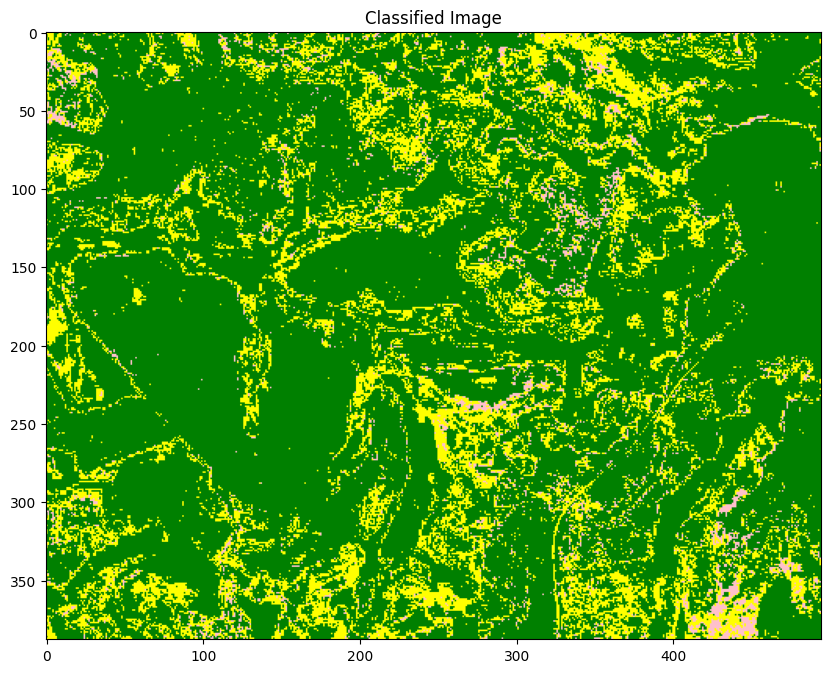

In [37]:
fazenda2_image_path = '/content/drive/MyDrive/GEE_Images/fazenda_MS_sentinel2021.tif'
with rasterio.open(fazenda2_image_path) as src:
  #bandas que usamos para calcular os indices de vegetacao
    band_blue = src.read(2)  # B02
    band_green = src.read(3)  # B03
    band_red = src.read(4)  # B04
    band_nir = src.read(8)  # B08
    band_swir1 = src.read(11)  # B11

    # Calcular os índices de vegetação para cada pixel
    indices = calculate_indices(band_red, band_nir, band_blue, band_green, band_swir1)

    # Reformular para ter uma lista de amostras de pixels para classificação
    pixel_samples = indices.reshape(-1, 5)

    # Fazer as previsões com o modelo
    pixel_classes = clf.predict(pixel_samples)

    # Reformular as previsões para ter a mesma forma da imagem original
    classification_map = pixel_classes.reshape(band_red.shape)

 # Definirmos o mapeamento de cores para a imagem classificada
color_mapping = {1: [255, 255, 0],     # Amarelo para pastagem
                 2: [255, 192, 203],   # Rosa para agricultura
                 3: [0, 128, 0]}       # Verde para vegetação natural

# Aplicar o mapeamento de cores para cada pixel classificado
classified_image = np.zeros((band_red.shape[0], band_red.shape[1], 3), dtype=np.uint8)
for class_value, color in color_mapping.items():
    classified_image[classification_map == class_value] = color

# Exibir a imagem classificada
plt.figure(figsize=(10, 10))
plt.imshow(classified_image)
plt.title('Classified Image')
plt.show()